In [1]:
import tensorflow as tf

In [3]:
# Load in the data
from sklearn.datasets import load_breast_cancer

# Load the data

df = load_breast_cancer()

In [6]:
# Check the typical 'data'
type(df)

sklearn.utils.Bunch

In [9]:
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
df.data.shape

(569, 30)

In [11]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
df.target.shape

(569,)

In [15]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.33)
N, D = X_train.shape

In [17]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Build the model
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Input(shape = (D,)),
                                   tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

# Evaluate the model
print("Train scores:", model.evaluate(X_train, y_train))
print("Test scores:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 1.1030 - accuracy: 0.4424 - val_loss: 0.9923 - val_accuracy: 0.4840
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0206 - accuracy: 0.4569 - val_loss: 0.9123 - val_accuracy: 0.4947
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9472 - accuracy: 0.5249 - val_loss: 0.8397 - val_accuracy: 0.5372
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8818 - accuracy: 0.5588 - val_loss: 0.7752 - val_accuracy: 0.5479
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7599 - accuracy: 0.6170 - val_loss: 0.7192 - val_accuracy: 0.5691
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7221 - accuracy: 0.6500 - val_loss: 0.6681 - val_accuracy: 0.6223
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6261 - accuracy: 0.6862 - val_loss: 0.6241 - val_accuracy: 0.6383
Epoch 8/100


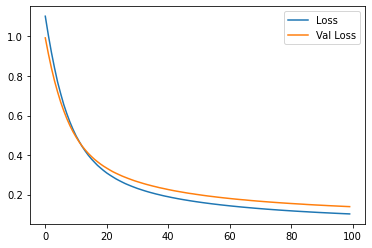

In [25]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Val Loss')
plt.legend()

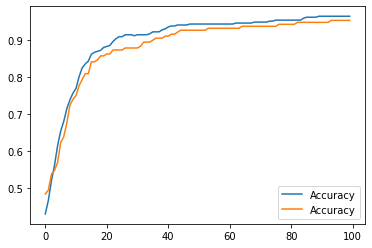

In [26]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = "Accuracy")
plt.legend()